In [92]:
#creating a map

!pip install folium
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import base64
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

map_e = folium.Map(
    location=[48.8534100, 2.3488000],
    tiles='openstreetmap',
    min_zoom=6,
    zoom_start=9,
    control_scale=True,
    zoom_control=False)

#folium.TileLayer(name='Ile de France')

#importing data
geo=f"https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson"
geod=f'https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/departements-ile-de-france.geojson'
education=pd.read_csv("edu.csv", sep=";", encoding = 'latin1')
education['P commune'] = education['P commune'].str.replace(',','.').astype(float)
education['P bac'] = education['P bac'].str.replace(',','.').astype(float)
dipl=pd.read_csv("diplo.csv", sep=";", encoding = 'latin1')
dipl['note'] = dipl['note'].str.replace(',','.').astype(float)
#pop=pd.read_csv("pop2.csv", sep=";")
eco=pd.read_csv("eco.csv", sep=";", encoding = 'latin1')
eco['salary'] = eco['salary'].str.replace(',','.').astype(float)
eco['entrep'] = eco['entrep']/100

#Diplomas
folium.Choropleth(
    geo_data=geo,
    name='Average Highest Academic Qualification',
    data=dipl,
    columns=['Nom de la commune', 'note'],
    key_on='feature.properties.nom',
    fill_color='GnBu',
    fill_opacity=0.8,
    line_opacity=0.5,
    bins=8,
    nan_fill_color='White',
    nan_fill_opacity=0.8,
    legend_name="0-None 1-Brevet 2-Bac 3-Uni",
    overlay=True,
    show=True
).add_to(map_e)

#réussite au bac
folium.Choropleth(
    geo_data=geo,
    name='Final Exam Pass Rate',
    data=education,
    columns=['Ville', 'P bac'],
    key_on='feature.properties.nom',
    fill_color='BuGn',
    fill_opacity=0.8,
    line_opacity=0.5,
    bins=6,
    nan_fill_color='White',
    nan_fill_opacity=1,
    legend_name="Final Exam Pass Rate (%)",
    overlay=True,
    show=False
).add_to(map_e)

#mentions
folium.Choropleth(
    geo_data=geo,
    name='Final Exam Mention Rate',
    data=education,
    columns=['Ville', 'P commune'],
    key_on='feature.properties.nom',
    fill_color='YlGn',
    fill_opacity=0.8,
    line_opacity=0.5,
    bins=6,
    nan_fill_color='White',
    nan_fill_opacity=1,
    legend_name="Final Exam Mention Rate (%)",
    overlay=True,
    show=False
).add_to(map_e)

#salaries
folium.Choropleth(
    geo_data=geo,
    name='Average hourly wage',
    data=eco,
    columns=['nom','salary'],
    key_on='feature.properties.nom',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.5,
    bins=[10,14,18,21,24,28,31,34,42],
    nan_fill_color='White',
    nan_fill_opacity=0.8,
    legend_name="Average hourly wage (€)",
    overlay=True,
    show=False
).add_to(map_e)

#Entrepreunarial
folium.Choropleth(
    geo_data=geo,
    name='Entrepreunarial Dynamism',
    data=eco,
    columns=['nom','entrep'],
    key_on='feature.properties.nom',
    fill_color='Reds',
    fill_opacity=0.8,
    line_opacity=0.5,
    bins=[1,2.5,5,10,20,40,80,125],
    nan_fill_color='White',
    nan_fill_opacity=0.8,
    legend_name="Entrepreunarial Dynamism (per hundreds of people)",
    overlay=True,
    show=False
).add_to(map_e)

#population
#folium.Choropleth(
#    geo_data=geo,
#    name='Population',
#    data=pop,
#    columns=['Nom de la commune', 'Population totale'],
#    key_on='feature.properties.nom',
#    fill_color='Greens',
#    fill_opacity=0.8,
#    line_opacity=0.5,
#    bins=[0,1000, 25000, 50000,100000,150000,250000],
#    nan_fill_color='White',
#    nan_fill_opacity=0.8,
#    legend_name="Population",
#    overlay=True,
#    show=True
#).add_to(map_e)

#Putting the names of the towns in the map
mnames=folium.GeoJson(
    data=geo,
    name="Map of Ile de France",
    style_function = lambda feature: dict(fillColor= '#00000000', color= '#00000000', weight=0, opacity=-1000),
    overlay=True,
    control=False,
    show=False,
    tooltip=folium.features.GeoJsonTooltip(
            fields=['nom'],
            labels=False)
).add_to(map_e)
map_e.keep_in_front(mnames)

#Departmental stats layer
depart=folium.GeoJson(
    data=geod,
    name='Departemental Stats',
    overlay=True,
    control=True,
    show=False
).add_to(map_e)

dstats={'Departements :' :['PARIS', 'YVELINES', 'SEINE ET MARNE', 'HAUTS DE SEINE', 'ESSONNE', 'VAL DE MARNE', 'Regional Stats', 'SEINE SAINT DENIS', 'VAL D OISE'],
    '/ Passed the exam (%) :' :[92.12, 90.95, 88.62, 89.03, 87.74, 88.04, 88.88, 85.11, 83.71],
    '/ Got a Mention (%) :':[56.01, 50.91, 42.67, 47.07, 43.47, 42.77, 45.38, 35.2, 37.35],
    '/ Average highest qualification level :':[2.17,1.8,1.47,2.01,1.66,1.67,1.72,1.35,1.62],
    '/ Unemployment rate ::':[6.7,6.6,7.1,6.7,6.8,7.6,7.7,11.2,8.8],
    '/ Entrepreunarial dynamism :':[12300,604,414,2223,517,1264,2427,1537,559],
    '/ Average hourly wage :':[24.51,20.54,15.74,22.27,17.19,17.14,18.48,14.06,16.39]
    }
df=pd.DataFrame.from_dict(dstats)

coord=[[48.8566969,48.761836,48.7524,48.8354,48.5303402,48.7576,48.8331,48.9265,49.0750704],
       [2.3514616,1.8882469,2.78901,2.2005,2.2392918,2.3928,2.32693,2.49308,2.2098114]]
resolution, width, height = 145, 7, 3
html = '<img src="data:image/png;base64,{}">'.format
for i in range (0,9):
    #print(df.loc[i])
    png='{}.png'.format(i)
    encoded = base64.b64encode(open(png, 'rb').read())
    iframe = folium.IFrame(html(encoded.decode('UTF-8')), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)
    folium.map.Marker(
        location=(coord[0][i],coord[1][i]),
        popup=popup,
        tooltip=dstats['Departements :'][i]
    ).add_to(depart)

#Saving the map
folium.LayerControl().add_to(map_e)
map_e
map_e.save("map_qm.html")

df

,Departements :,/ Passed the exam (%) :,/ Got a Mention (%) :,/ Average highest qualification level :,/ Unemployment rate ::,/ Entrepreunarial dynamism :,/ Average hourly wage :
0,PARIS,92.12,56.01,2.17,6.7,12300,24.51
1,YVELINES,90.95,50.91,1.80,6.6,604,20.54
2,SEINE ET MARNE,88.62,42.67,1.47,7.1,414,15.74
3,HAUTS DE SEINE,89.03,47.07,2.01,6.7,2223,22.27
4,ESSONNE,87.74,43.47,1.66,6.8,517,17.19
5,VAL DE MARNE,88.04,42.77,1.67,7.6,1264,17.14
6,Regional Stats,88.88,45.38,1.72,7.7,2427,18.48
7,SEINE SAINT DENIS,85.11,35.20,1.35,11.2,1537,14.06
8,VAL D OISE,83.71,37.35,1.62,8.8,559,16.39


Text(0.5, 1.0, 'Unemployment rate\nfor each departement in Ile de France')

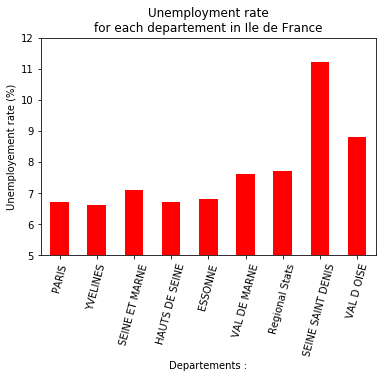

In [39]:
#Creating a bar chart
ax=df.plot.bar(x='Departements :', y='/ Unemployment rate :',  color='red', width=0.5, rot=75, legend=0)
plt.xlabel=('Departements')
plt.ylim([5, 12])
plt.ylabel('Unemployement rate (%)')
plt.title('Unemployment rate\nfor each departement in Ile de France')

Text(0.5, 1.0, "Average highest academic qualification \nof each departement's population in Ile-de-France")

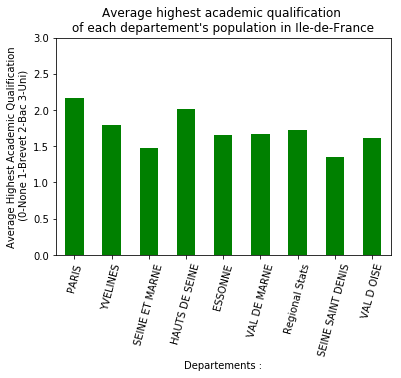

In [32]:
#Creating another bar chart
ax=df.plot.bar(x='Departements :', y='/ Average highest qualification level :',  color='green', width=0.5, rot=75, legend=0)
plt.xlabel=('Departements')
plt.ylim([0, 3])
plt.ylabel('Average Highest Academic Qualification\n (0-None 1-Brevet 2-Bac 3-Uni)')
plt.title('Average highest academic qualification \nof each departement\'s population in Ile-de-France')

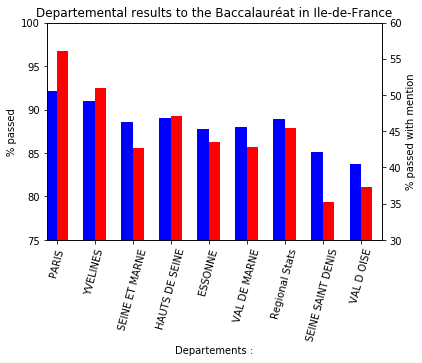

In [53]:
#Creating another bar chart
ax=df.plot.bar(x='Departements :', y='/ Passed the exam (%) :',  color='blue', width=0.3, rot=75, position=1, legend=0)
plt.xlabel=('Departements')
plt.ylim([75, 100])
plt.ylabel('% passed')
ax2=ax.twinx()
ax2=df.plot.bar(x='Departements :', y='/ Got a Mention (%) :', ax=ax2, color='red', width=0.3, rot=75, position=0, legend=0)
plt.ylim([30, 60])
plt.ylabel('% passed with mention')
plt.title('Departemental results to the Baccalauréat in Ile-de-France')
plt.legend=([ax,ax2],['passed', 'mention'])


Text(0.5, 1.0, "Average hourly wage \nof each departement's population in Ile-de-France")

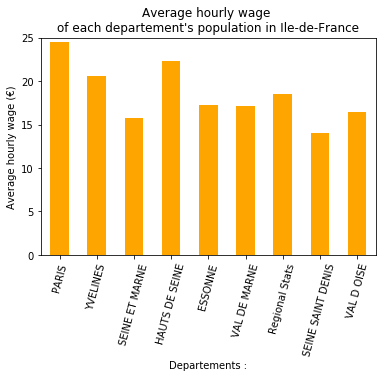

In [81]:
#Creating another bar chart
ax=df.plot.bar(x='Departements :', y='/ Average hourly wage :',  color='orange', width=0.5, rot=75, legend=0)
plt.xlabel=('Departements')
plt.ylim([0, 25])
plt.ylabel('Average hourly wage (€)')
plt.title('Average hourly wage \nof each departement\'s population in Ile-de-France')

Text(0.5, 1.0, "Entrepreunarial Dynamism \nof each departement's population in Ile-de-France")

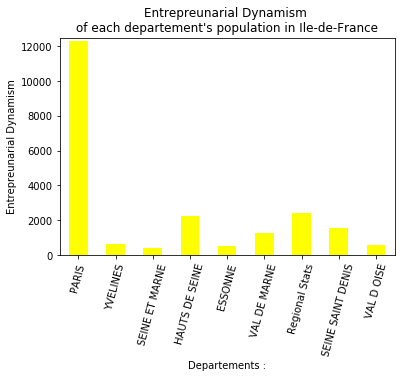

In [82]:
#Creating another bar chart
ax=df.plot.bar(x='Departements :', y='/ Entrepreunarial dynamism :',  color='yellow', width=0.5, rot=75, legend=0)
plt.xlabel=('Departements')
plt.ylim([0, 12500])
plt.ylabel('Entrepreunarial Dynamism')
plt.title('Entrepreunarial Dynamism \nof each departement\'s population in Ile-de-France')

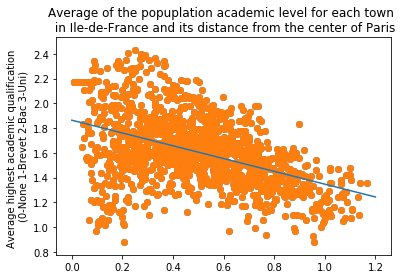

-0.4588507261931816
5.2200560576325605e-68


In [85]:
#Creating a scatter plot graph

#importing data
dist=pd.read_csv("dist.csv", sep=";", encoding = 'latin1')
dist['Distance'] = dist['Distance'].str.replace(',','.').astype(float)
dist['note'] = dist['note'].str.replace(',','.').astype(float)

#creating the graph
x=dist['Distance']
y=dist['note']
plt.scatter(x, y);

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 1.2, 50)
yfit = model.predict(xfit[:, np.newaxis])
#plt.xlabel('Distance from Paris center (km)')
plt.ylabel('Average highest academic qualification \n(0-None 1-Brevet 2-Bac 3-Uni)')
plt.title('Average of the popuplation academic level for each town \n in Ile-de-France and its distance from the center of Paris')
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

#get stats
r= linregress(x,y)
print(r.rvalue)
print(r.pvalue)


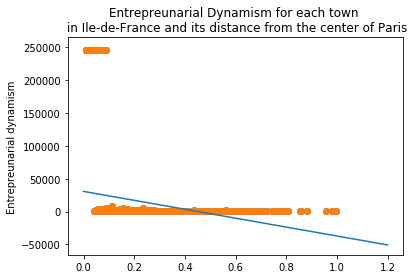

-0.2838716797223533
1.2350525559430204e-11


In [109]:
#Creating another scatter plot graph

#creating the graph
#importing data
ecodist=pd.read_csv("ecodist.csv", sep=";", encoding = 'latin1')
ecodist['Distance'] = ecodist['Distance'].str.replace(',','.').astype(float)
ecodist['salary'] = ecodist['salary'].str.replace(',','.').astype(float)

x=ecodist['Distance']
y=ecodist['entrep']
plt.scatter(x, y);

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 1.2, 50)
yfit = model.predict(xfit[:, np.newaxis])
#plt.xlabel('Distance from Paris center (km)')
plt.ylabel('Entrepreunarial dynamism')
plt.title('Entrepreunarial Dynamism for each town \n in Ile-de-France and its distance from the center of Paris')
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

#get stats
from scipy.stats import linregress
r= linregress(x,y)
print(r.rvalue)
print(r.pvalue)


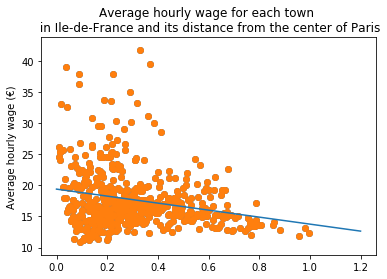

-0.23502841591328646
2.5098676980553058e-08


In [110]:
#Creating another scatter plot graph

#creating the graph
y=ecodist['salary']
plt.scatter(x, y);

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 1.2, 50)
yfit = model.predict(xfit[:, np.newaxis])
#plt.xlabel('Distance from Paris center (km)')
plt.ylabel('Average hourly wage (€)')
plt.title('Average hourly wage for each town \n in Ile-de-France and its distance from the center of Paris')
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

#get stats
from scipy.stats import linregress
r= linregress(x,y)
print(r.rvalue)
print(r.pvalue)


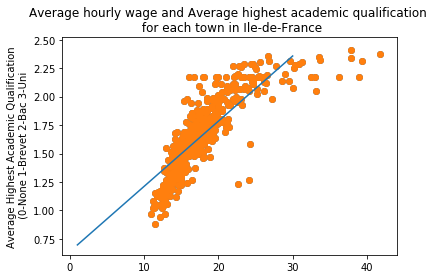

0.8282490988730344
6.612107964110141e-134


In [127]:
#creating the graph
#importing data
ecoedu=pd.read_csv("ecoedu.csv", sep=";", encoding = 'latin1')
ecoedu['note'] = ecoedu['note'].str.replace(',','.').astype(float)
ecoedu['salaire'] = ecoedu['salaire'].str.replace(',','.').astype(float)
x=ecoedu['salaire']
y=ecoedu['note']
plt.scatter(x, y);

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(30, 1, 50)
yfit = model.predict(xfit[:, np.newaxis])
plt.ylabel('Average Highest Academic Qualification\n (0-None 1-Brevet 2-Bac 3-Uni')
#plt.xlabel('Average hourly wage (€)')
plt.title('Average hourly wage and Average highest academic qualification \n for each town in Ile-de-France')
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

#get stats
r= linregress(x,y)
print(r.rvalue)
print(r.pvalue)

In [27]:
#from tkinter import *

#master = Tk()
#e = Entry(master)
#e.pack()
#e.focus_set()

#def callback():
#    print (e.get())

#b = Button(master, text = "Search", width = 10, command = callback)
#b.pack()

#mainloop()

# plt.bar(depart[0], depart[i+1], color='green')
#    plt.xticks(depart[i], depart[0])
#    plt.ylabel('Percentages of students')
#    plt.title('Education and Economic level of ' + names[i])